In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colorizer as clr
import numpy as np
import os

current_path = Path().resolve()
parent_path = current_path.parent
root_path = parent_path._str
data = pd.read_csv(f"{root_path}/penglings.csv")


<StringArray>
['Adelie', 'Gentoo', 'Chinstrap']
Length: 3, dtype: str


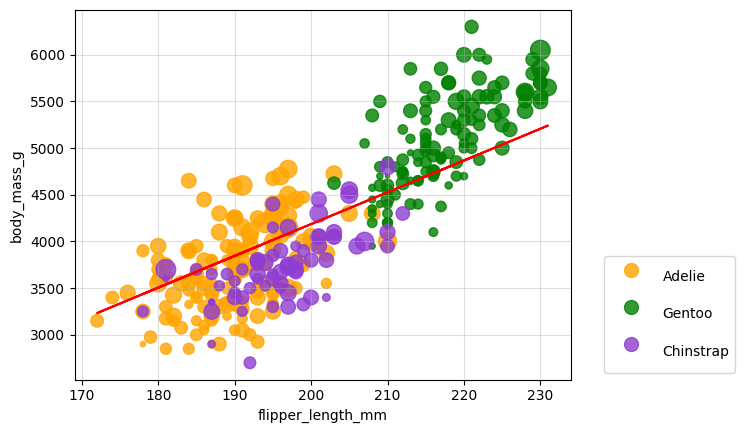

In [40]:
#Flipper Length X
#Body Mass Y
# with groupings by species

species = data.species.unique()

colormap = {
   "Adelie": "#FFA500",
   "Chinstrap": "#8F3DD1",
   "Gentoo": "#008000"
}
print(species)
for t in species:
    point = data[data["species"] == t]
    #Normalize bill_length
    sizes = (point["bill_length_mm"] - point["bill_length_mm"].min()) / (
    point["bill_length_mm"].max() - point["bill_length_mm"].min()
)
    plt.scatter(
        x=point["flipper_length_mm"],
        y=point["body_mass_g"],
        c=colormap[t],
        s= sizes * 200,
        label=t,
        alpha=0.8
        
    )
x = np.nan_to_num(data.flipper_length_mm, nan=0.0, posinf=0, neginf=0)
y =np.nan_to_num(data.body_mass_g, nan=0.0, posinf=0, neginf=0)
plt.legend(loc="lower center", bbox_to_anchor=(0.6, 0., 1.2, 1), handleheight=3, handlelength=3)
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.grid(True, alpha=0.4)
m, b = np.polyfit(x=x, y=y, deg=1)
plt.plot(data["flipper_length_mm"], m * data["flipper_length_mm"] + b, color="red")
